<a href="https://colab.research.google.com/github/NikhilGupta963/Yulu-Case-Study/blob/main/yulu_business_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case Study - Yulu - Hypothesis Testing - Nikhil Gupta**

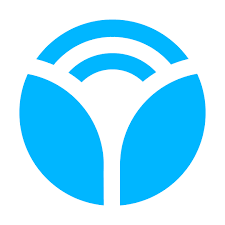

# *About Yulu* <br>
Yulu is India's largest shared micro-mobility service provider using electric two-wheelers to reduce traffic congestion and air pollution in urban India. Yulu service is actively used for the last-mile commute as well as last-mile deliveries, making a real impact on India's goal of electrifying its mobility by 2030.

# *Why Hypothesis testing?* <br>
Recent revenue setbacks have prompted Yulu to seek the expertise of a consulting
company to delve into the factors influencing the demand for their shared electric cycles,
specifically in the Indian market.


*   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*   How well those variables describe the electric cycle demands




In [ ]:
!pip install gdown

In [ ]:
# Column Profiling:
# ● datetime: datetime
# ● season: season (1: spring, 2: summer, 3: fall, 4: winter)
# ● holiday : whether day is a holiday or not
# ● workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# ● weather:
# o 1: Clear, Few clouds, partly cloudy
# o 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# o 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# o 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
# ● temp: temperature in Celsius
# ● atemp: feeling temperature in Celsius
# ● humidity: humidity
# ● windspeed: wind speed
# ● casual: count of casual users
# ● registered: count of registered users
# ● count: count of total rental bikes including both casual and registered

# Mounting the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/datasets"

# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset

In [ ]:
data = pd.read_csv(path+"/bike_sharing.csv")
data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


# Exploratory Data Analysis

In [ ]:
data.shape

(10886, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['datetime']).dt.date
data['Time'] = pd.to_datetime(data['datetime']).dt.time
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00


In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
Date            456
Time             24
dtype: int64

In [ ]:
data.isnull()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Time
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

# *Univariate Analysis*

In [ ]:
data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00


In [ ]:
season_data = data.groupby(["season"])["count"].sum()
season_data

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

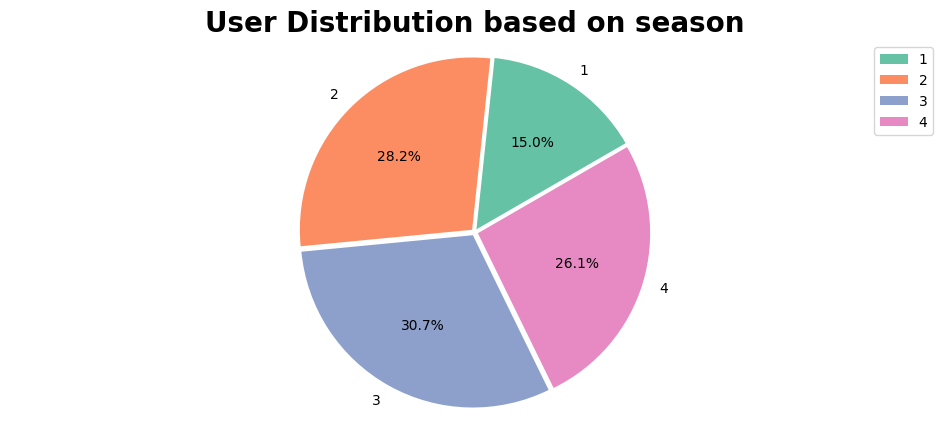

In [ ]:
# ● season: season (1: spring, 2: summer, 3: fall, 4: winter)
plt.figure(figsize = (12, 5))
plt.pie(season_data.values, labels = season_data.index, startangle = 30, autopct = '%1.1f%%',colors=sns.color_palette('Set2'), explode=[0.02, 0.02, 0.02, 0.02])
plt.title('User Distribution based on season', fontdict = {'fontsize' :20, 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

In [ ]:
# check the relation of count of users based on season
holiday_data = data.groupby(["holiday"])["count"].sum()
holiday_data

holiday
0    2027668
1      57808
Name: count, dtype: int64

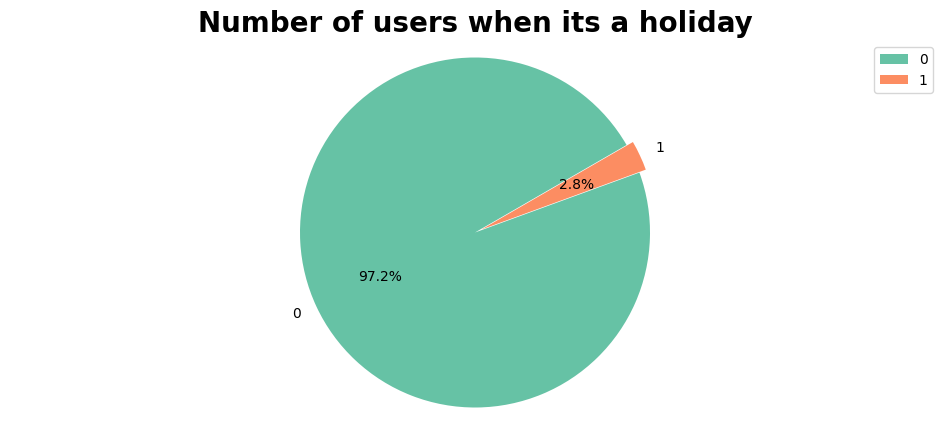

In [ ]:
# graphical analysis
# relation between product category and other features through graphs
plt.figure(figsize = (12, 5))
plt.pie(holiday_data.values, labels = holiday_data.index, startangle = 30,  autopct = '%1.1f%%',colors=sns.color_palette('Set2'), explode=[0.02, 0.02])
plt.title('Number of users when its a holiday', fontdict = {'fontsize' :20, 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

In [ ]:
workingday_data = data.groupby(["workingday"])['count'].sum()
workingday_data

workingday
0     654872
1    1430604
Name: count, dtype: int64

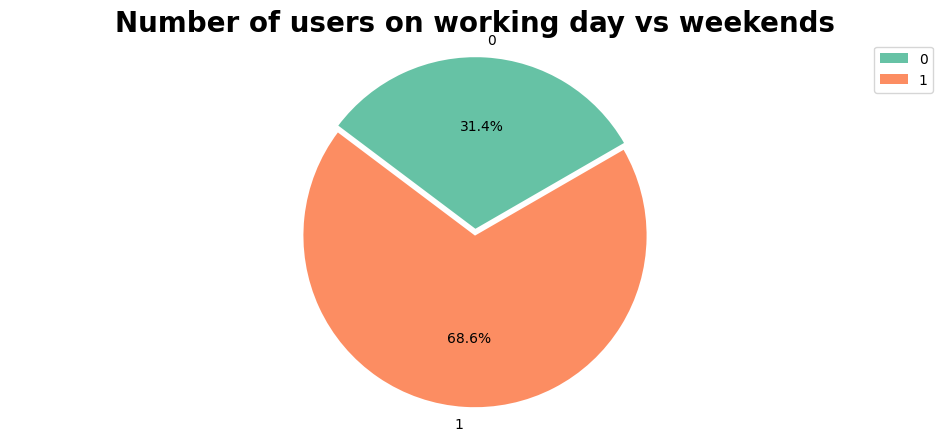

In [ ]:
plt.figure(figsize = (12, 5))
plt.pie(workingday_data.values, labels = workingday_data.index, startangle = 30,  autopct = '%1.1f%%',colors=sns.color_palette('Set2'), explode=[0.02, 0.02])
plt.title('Number of users on working day vs weekends', fontdict = {'fontsize' :20, 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

In [ ]:
weather_data = data.groupby(["weather"])['count'].sum()
weather_data

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

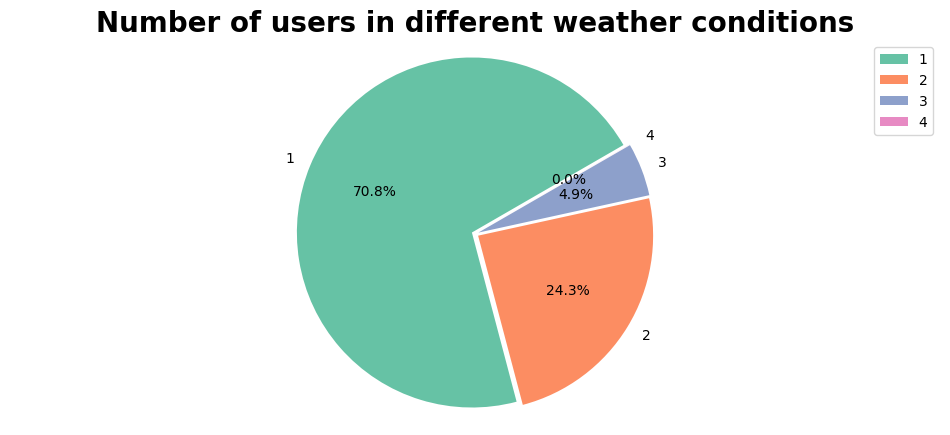

In [ ]:
plt.figure(figsize = (12, 5))
plt.pie(weather_data.values, labels = weather_data.index, startangle = 30,  autopct = '%1.1f%%',colors=sns.color_palette('Set2'), explode=[0.02, 0.02, 0.02, 0.02])
plt.title('Number of users in different weather conditions', fontdict = {'fontsize' :20, 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

In [ ]:
data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00


<Figure size 640x480 with 0 Axes>

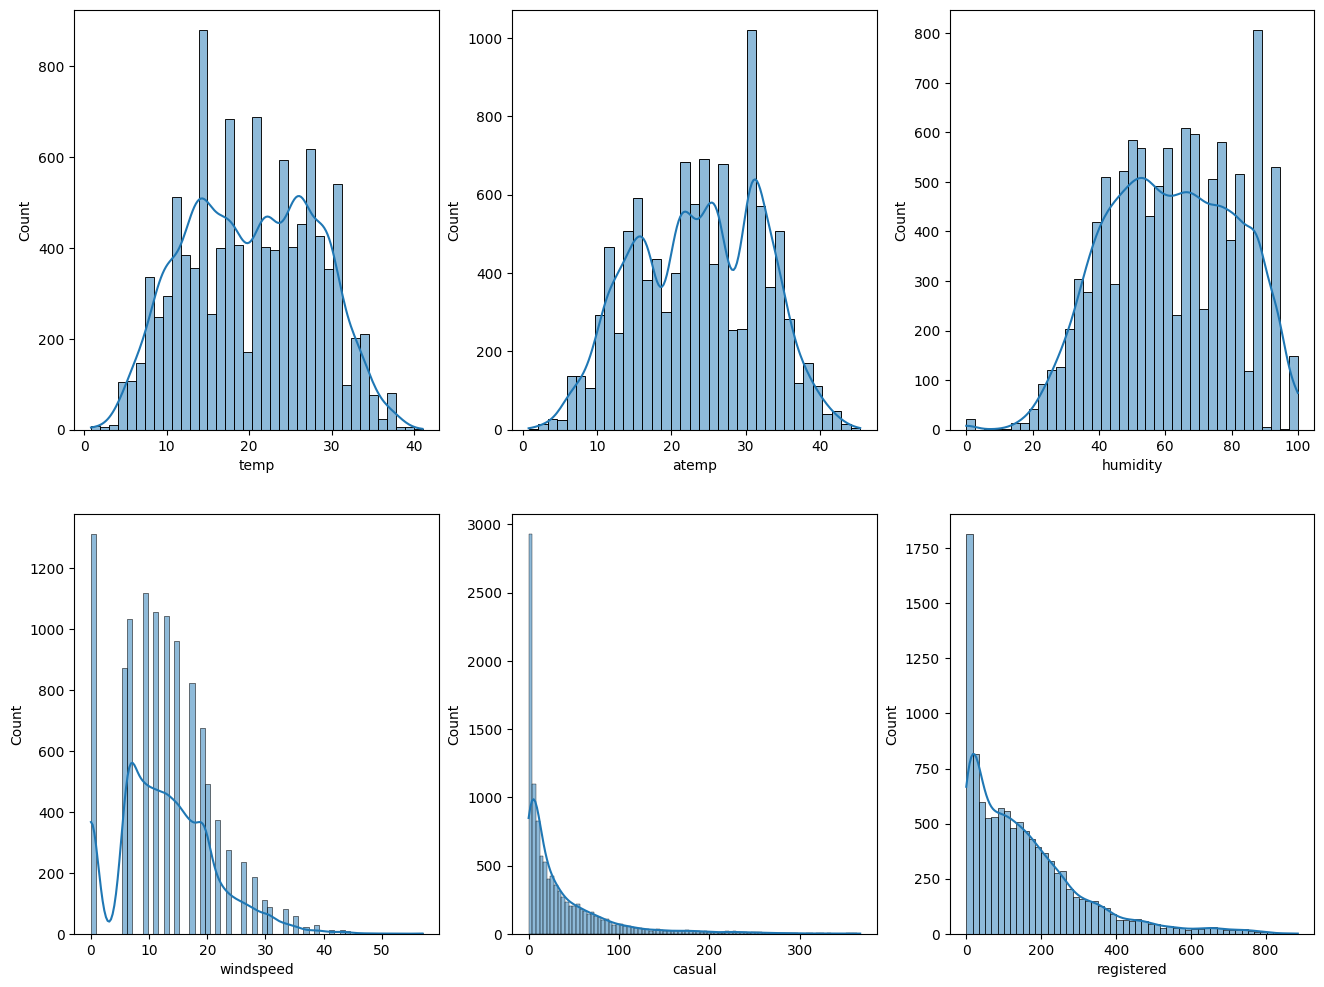

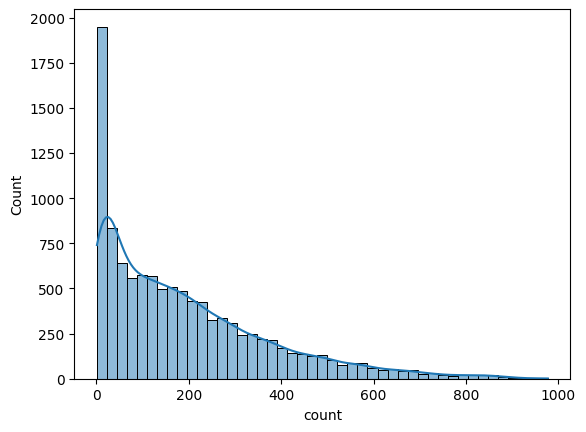

In [ ]:
# relationship between the count of users vs other numerical factors
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
plt.suptitle("Count of users based on different conditions")
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(data[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(data[num_cols[-1]], kde=True)
plt.show()



*   Temperature, feels like temperature, humidity has a normal distribution
*   Casual, registered, and count have a log normal distribution.



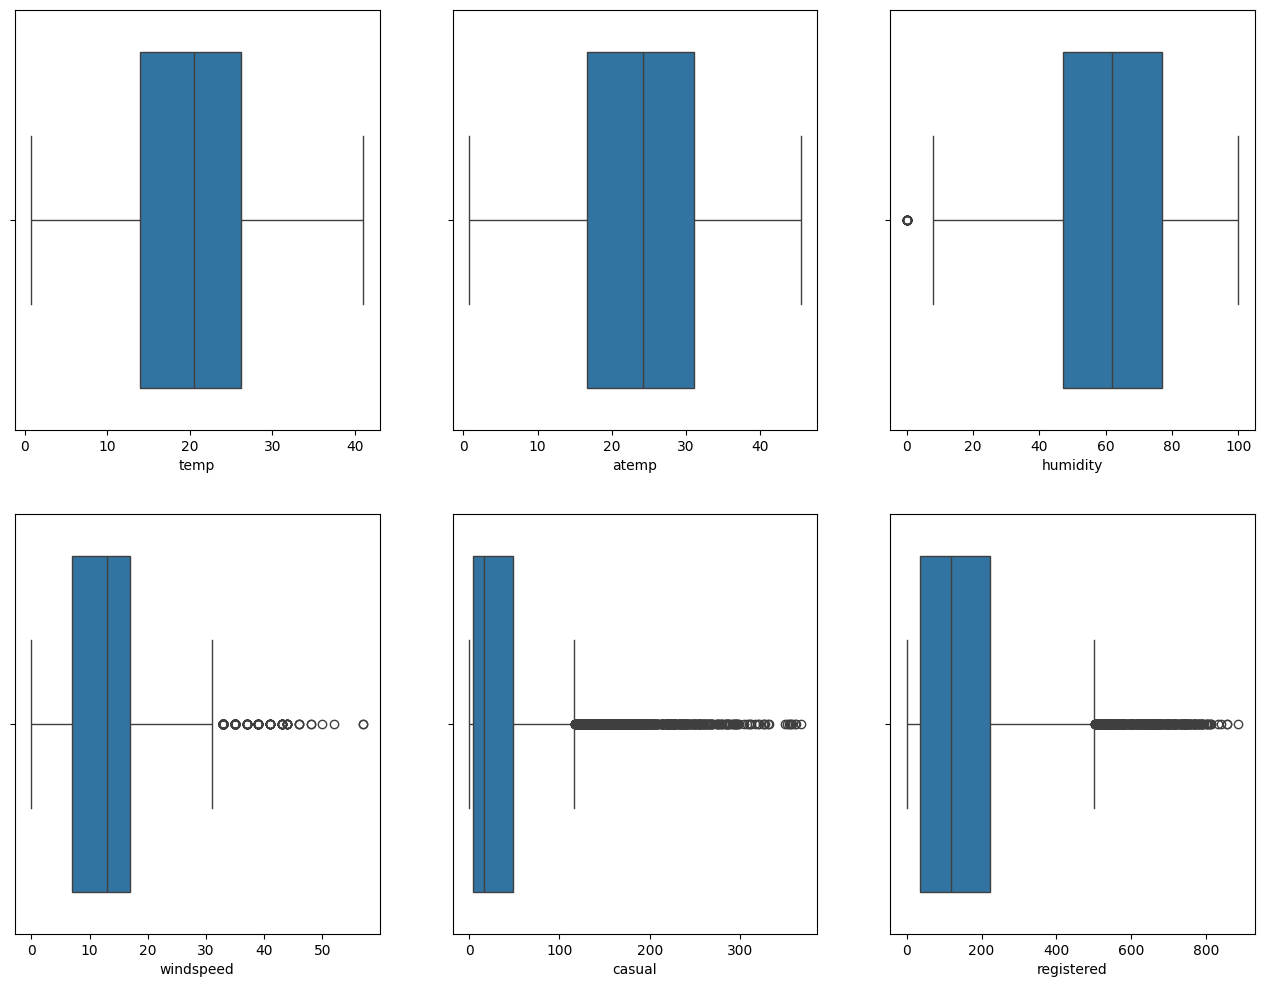

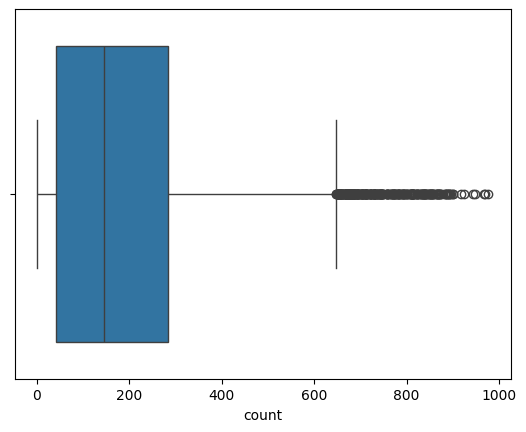

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=data[num_cols[index]], ax=axis[row, col])
        index += 1

plt.show()
sns.boxplot(x=data[num_cols[-1]])
plt.show()

Humidity, windspeed, casual, registered, count have outliers in the data.

# *Bivariate Analysis*

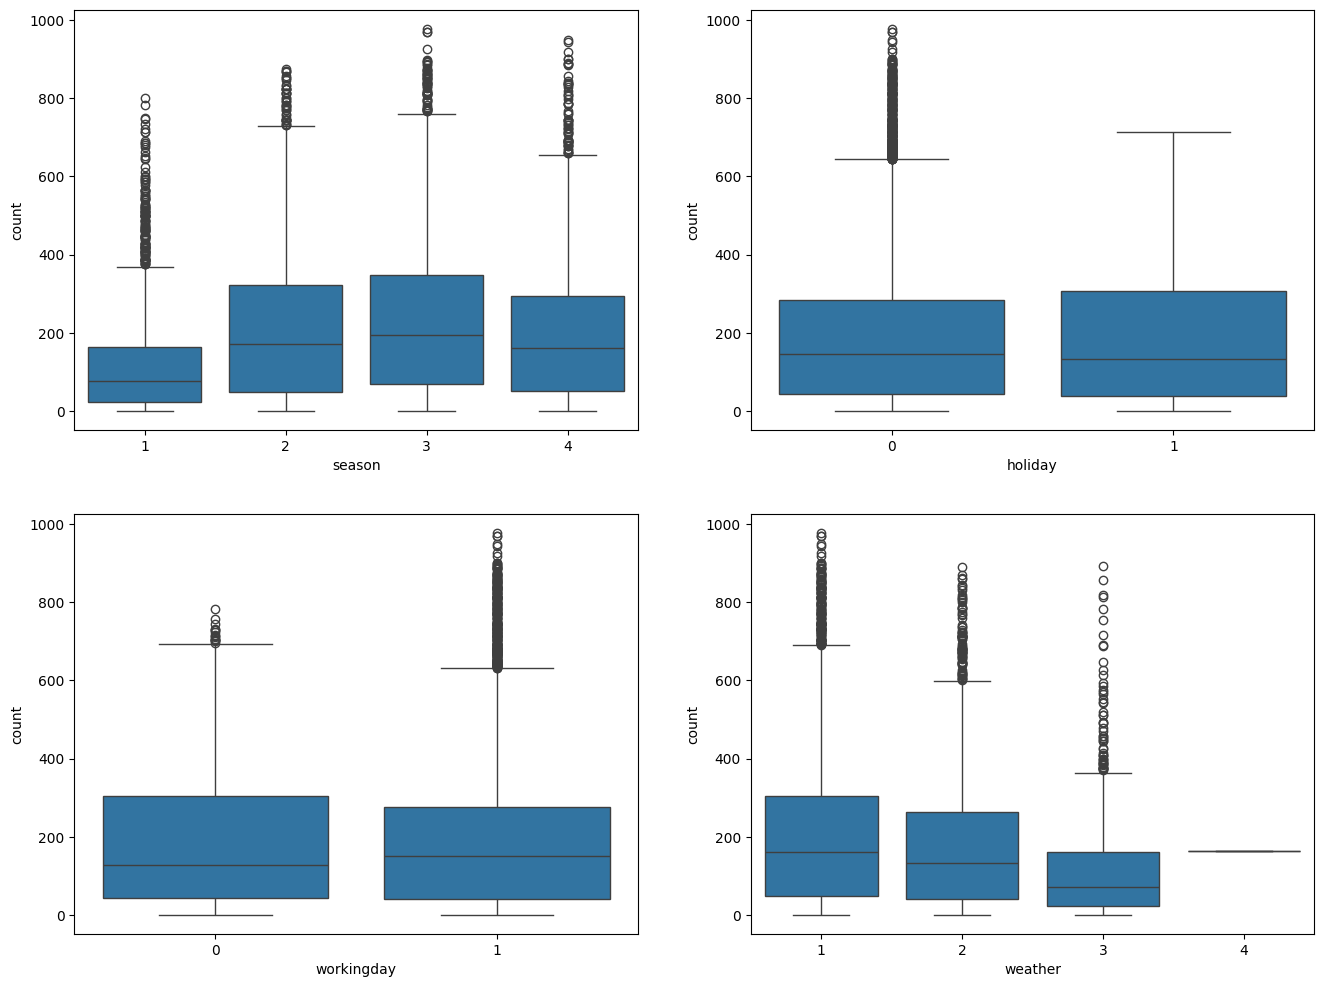

In [ ]:
# plotting categorical variables against count using boxplots
cat_cols = ["season",	"holiday",	"workingday",	"weather"]
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=data, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

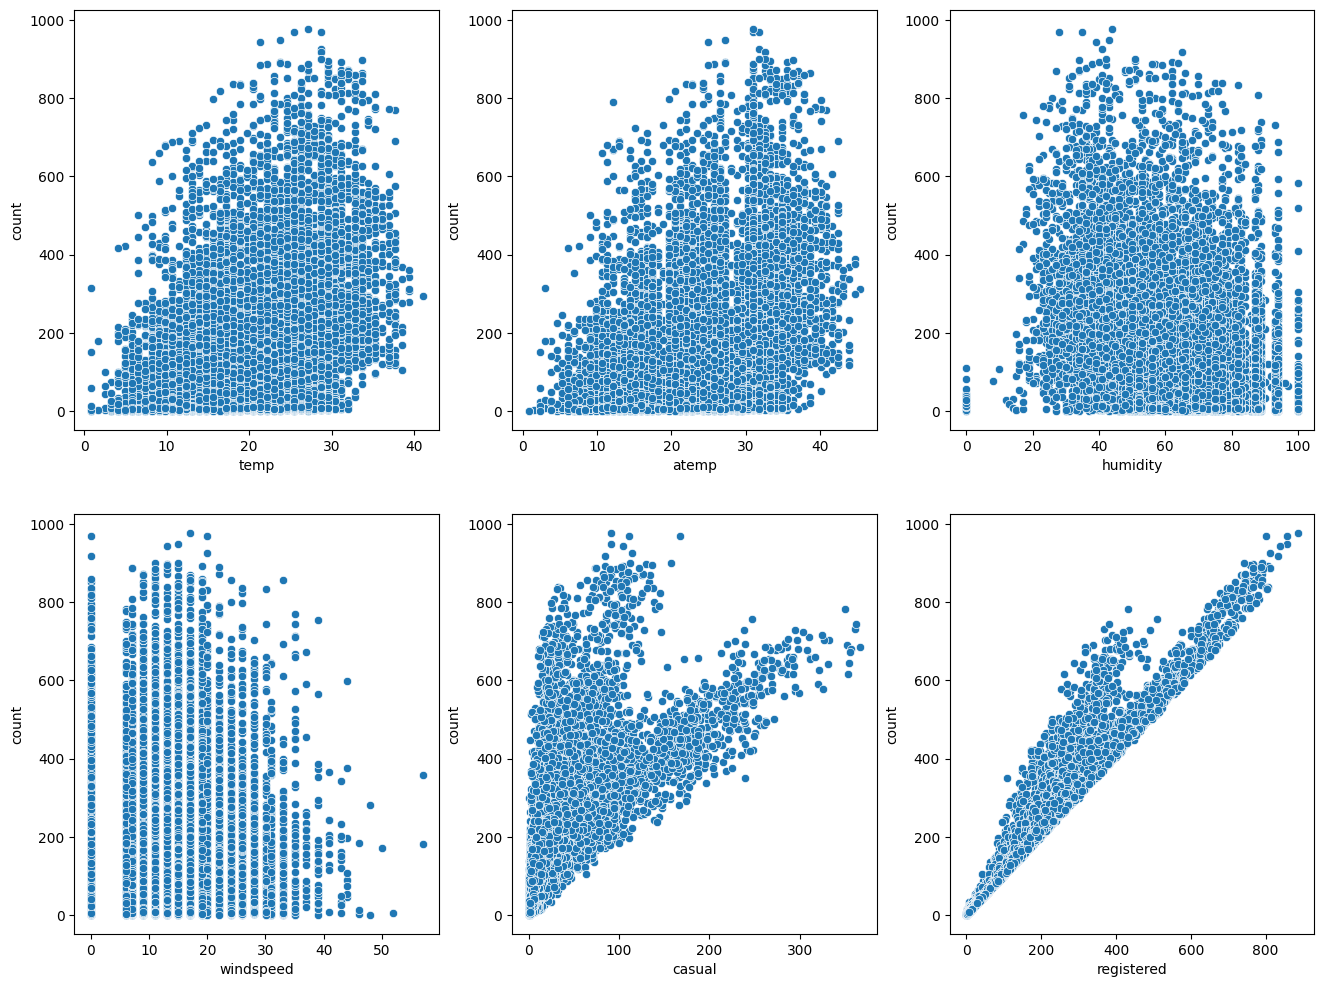

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=data, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

In [ ]:
data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00


In [ ]:
df = data.drop(["datetime"], axis=1)
df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Time
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00


In [ ]:
data_table = pd.crosstab(df['season'], df['weather'])
data_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


# ***Is there any significant difference between the no. of bike rides on Weekdays and Weekends?***

 H0 - There is no Significant difference between the no. of bike rides on Weekdays and Weekends<br>
 Ha - There is a significant difference between the no. of bike rides on Weekdays and Weekends<br>
The data on which we are testing our hypothesis is numerical vs categorical data<br>
 Hence we perform ttest_ind on the dataset to test if there is any difference in number of bike rides on week days vs weekends

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
weekend = df[df['workingday']==0]['count'].values
weekdays = df[df['workingday']==1]['count'].values

In [ ]:
t_stat, pvalue = ttest_ind(weekend, weekdays)
t_stat, pvalue

(-1.2096277376026694, 0.22644804226361348)

In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Fail to Reject H0


# *Is the demand of bicycles on rent is the same for different Weather conditions*
<br>
H0 - there is no difference in bicycle demand for different weather conditions<br>
Ha - there is a significant difference in the bicycle demand for different weather conditions<br>

As the there are multiple samples of data and the sample of data are numerical vs categorical, we will be using ANOVA for our hypothesis testing

In [ ]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import levene

In [ ]:
# defining the data groups for the ANOVA

group1 = df[df['weather']==1]['count'].values
group2 = df[df['weather']==2]['count'].values
group3 = df[df['weather']==3]['count'].values
group4 = df[df['weather']==4]['count'].values

*Check if the data is normally distributed or not.*

<Axes: xlabel='count', ylabel='Count'>

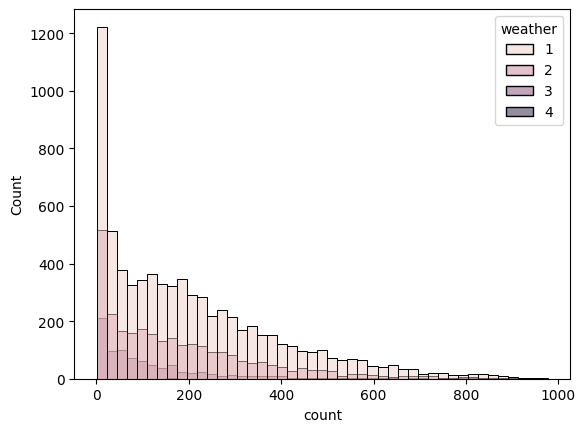

In [ ]:
sns.histplot(data = df, x = "count", hue = "weather")

In [ ]:
from statsmodels.graphics.gofplots import qqplot

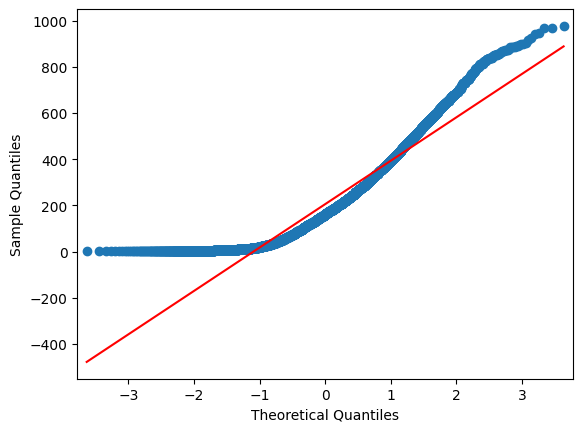

In [ ]:
qqplot(group1, line = "s")
plt.show()

check for other groups as well

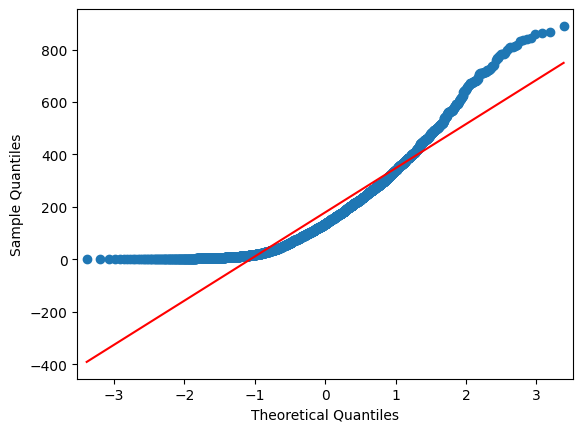

In [ ]:
qqplot(group2, line = "s")
plt.show()

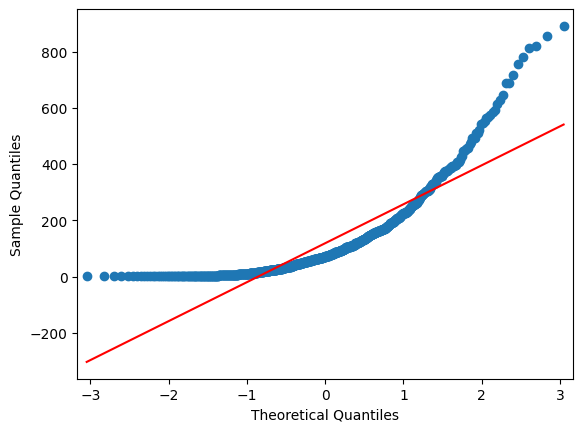

In [ ]:
qqplot(group3, line = "s")
plt.show()

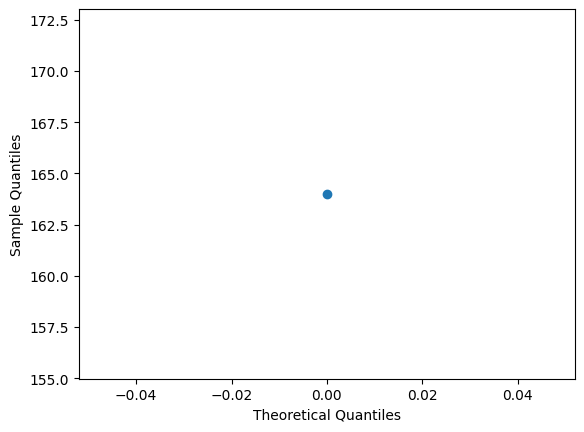

In [ ]:
qqplot(group4, line = "s")
plt.show()

Hence from the above data we conclude that the data is not gaussian

*Performing levene's test*

In [ ]:
#H0: Variances are equal
#Ha: Variances are not equal

levene_stat, p_value = levene(group1, group2, group3, group4)
print(p_value)

if p_value < 0.05:
  print("Reject H0: Variances are not equal")
else:
  print("Failed to reject null hypothesis")

3.504937946833238e-35
Reject H0: Variances are not equal


Hence the assumptions of ANOVA failed so, we will move forward with the kuskal test

In [ ]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

In [ ]:
if p_value < 0.05:
  print("Reject H0")
else:
  print("Failed to reject null hypothesis")

Reject H0


***Hence there is a significant difference in the bicycle demand for different weather conditions***

#  *Is the demand of bicycles on rent is the same for different Seasons?* <br>

H0 - The demand of bicycle has no impact on the seasonal changes <br>
Ha - The demand of bicycle has significant impact on the seasonal changes<br>

Since there are multiple samples of dataset and the testing to be done on the dataset is numerical vs categorical hence we will conduct ANOVA test

In [ ]:
group5 = df[df['season']==1]['count'].values
group6 = df[df['season']==2]['count'].values
group7 = df[df['season']==3]['count'].values
group8 = df[df['season']==4]['count'].values

*Check if the data is normally distributed or not.*

<Axes: xlabel='count', ylabel='Count'>

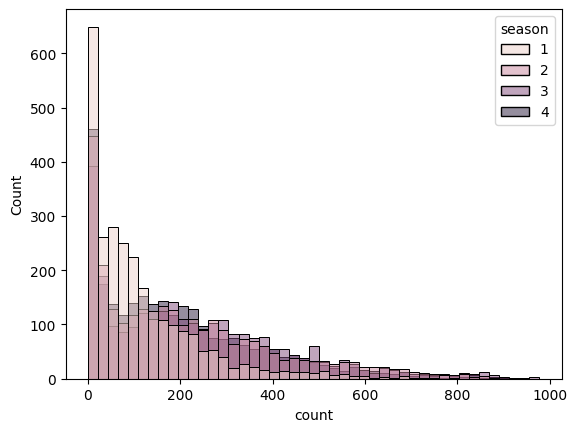

In [ ]:
sns.histplot(data = df, x = "count", hue = "season")

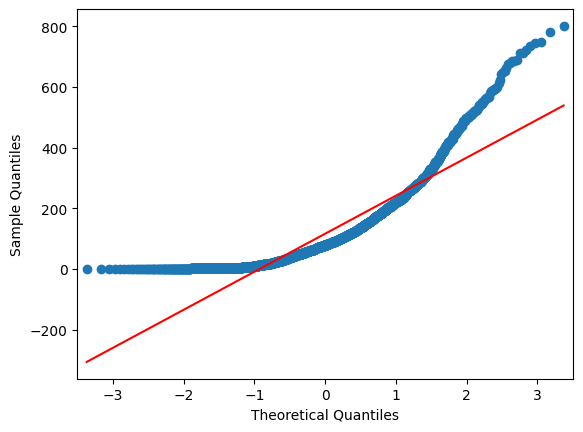

In [ ]:
qqplot(group5, line = "s")
plt.show()

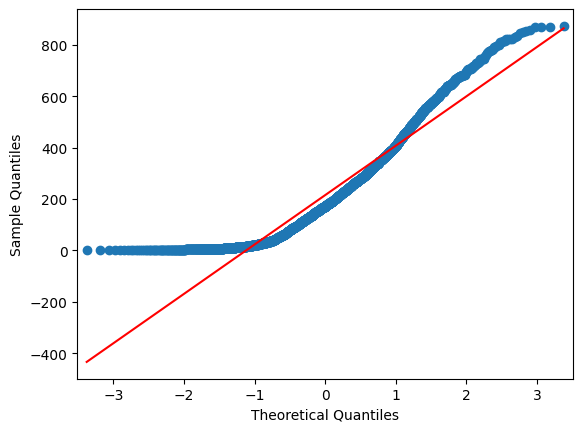

In [ ]:
qqplot(group6, line = "s")
plt.show()

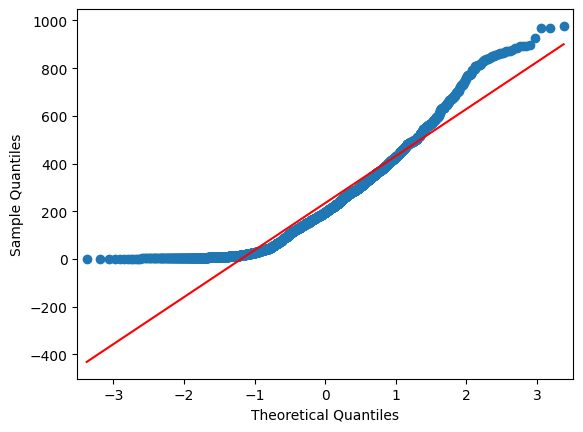

In [ ]:
qqplot(group7, line = "s")
plt.show()

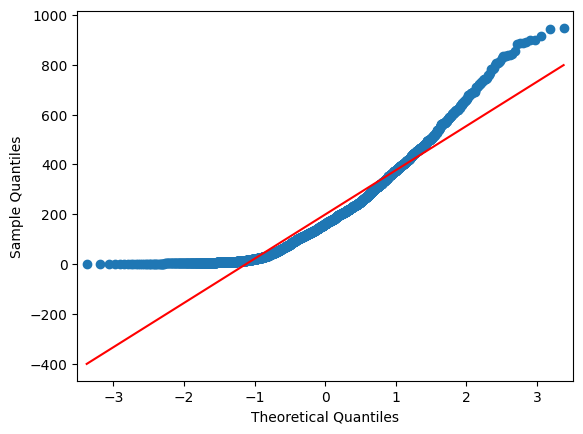

In [ ]:
qqplot(group8, line = "s")
plt.show()

***From the graphical analysis of data we can conclude that the data is not normally distributed. Hence we will go with kruskal test. But firstly, we will check for levene's test***

In [ ]:
from scipy.stats import levene

#H0: Variances are equal
#Ha: Variances are not equal

levene_stat, p_value = levene(group5, group6, group7, group8)
print(p_value)

if p_value < 0.05:
  print("Reject H0: Variances are not equal")
else:
  print("failed to reject H0")

1.0147116860043298e-118
Reject H0: Variances are not equal


Hence, we can conclude that the variance are not equal. So, finally we will go with the Kruskal test

In [ ]:
kruskal(group5, group6, group7, group8)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

In [ ]:
if p_value < 0.05:
  print("Reject H0")
else:
  print("Failed to reject null hypothesis")

Reject H0


Hence, we can conclude that The demand of bicycle has significant impact on the seasonal changes

#  *if the Weather conditions are significantly different during different Seasons?* <br>

H0 - weather conditions are not significantly different during different seasons<br>
Ha - weather conditions are significantly different during different seasons <br>
Since, the datasets we are going to test are categorical vs categorical. Hence, we will be conducting chi-squared test for the following.


# *Is the Weather conditions are significantly different during different Seasons?*

In [ ]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [ ]:
weather_season_crosstab = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
weather_season_crosstab

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
chi_stat, p_value, df, exp_freq = chi2_contingency(weather_season_crosstab)

print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

chi_stat: 49.158655596893624
p_value: 1.549925073686492e-07
df: 9
exp_freq: [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]


In [ ]:
if p_value < 0.05:
  print("Reject H0: Weather and season are dependent")
else:
  print("failed to reject H0")

Reject H0: Weather and season are dependent


# **Insights**


*   Bike rentals are nore in summer(28.2%) and falls(30.7%)
*   Number of bike rentals are less when the humidity is less
*   Bike rentals are less in cold weather(<10° C)
*   When wind speed is more than 30 the number of bike rentals are less
*   Bike rentals are more when the temperature is greater than 10° C and less than 30° C
*   Bike rentals are more between 20-80 humidity







# **Recommendations**


*   Company should meet the customer requirements i.e: fulfill the stock in falls and summers as the requirement ihs high in these seasons
*   Bike circulation must be there based on season, temperature and humidity for economic profit. For example : According to the season and weather the number of bikes at a location can be increased or decreased so that customers do not face shortage.
*   Based on weather forecast company should make predictions that how much bikes must be provided at each stations to get more profit in less bikes
*   There is no use of keeping more number of bikes at the place where the weather forecast shows very low or very high humidity, or very low temperature(<10° C) or high windspeed or thunnderstorm.




In [ ]:
%%shell
jupyter nbconvert --to html /content/yulu_business_case_study.ipynb

[NbConvertApp] Converting notebook /content/yulu_business_case_study.ipynb to html
[NbConvertApp] Writing 2155367 bytes to /content/yulu_business_case_study.html
